# Task3: Features Engineering an Modeling

This task will be related to most-relevant-features-choosing. Before do any analysis, the colleague recommend one feature that they found in data cleaning process "the difference between off-peak prices in December and January the preceding year". <br><br>
1. Create the recommended feature.
2. Feature Engineer; Deep drive into features, handling with skewness and finding significant features in term of churning,.
3. Modeling, Random Forest.

In [8]:
# Import essential package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [9]:
data = pd.read_csv("/Users/moomacprom1/Data_science/Port/Virtual_Internship/BCG/Data/final_data.csv")
data.head(5)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean3m_price_p1_var,mean3m_price_p2_var,mean3m_price_p3_var,mean3m_price_p1_fix,mean3m_price_p2_fix,mean3m_price_p3_fix,mean3m_price_p1,mean3m_price_p2,mean3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.126997,0.095024,0.049213,41.908233,16.291553,10.861037,42.035230,16.386577,10.910249,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [10]:
# Change object to be datetime
data['date_activ'] = pd.to_datetime(data['date_activ'], format='%Y-%m-%d')
data['date_end'] = pd.to_datetime(data['date_end'], format='%Y-%m-%d')
data['date_modif_prod'] = pd.to_datetime(data['date_modif_prod'], format='%Y-%m-%d')
data['date_renewal'] = pd.to_datetime(data['date_renewal'], format='%Y-%m-%d')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      14606 non-null  int64         
 1   id                              14606 non-null  object        
 2   channel_sales                   14606 non-null  object        
 3   cons_12m                        14606 non-null  int64         
 4   cons_gas_12m                    14606 non-null  int64         
 5   cons_last_month                 14606 non-null  int64         
 6   date_activ                      14606 non-null  datetime64[ns]
 7   date_end                        14606 non-null  datetime64[ns]
 8   date_modif_prod                 14606 non-null  datetime64[ns]
 9   date_renewal                    14606 non-null  datetime64[ns]
 10  forecast_cons_12m               14606 non-null  float64       
 11  fo

## 1. Creating recommended feature
This feature is the difference between off-peak prices in December and January. Off-peak data in this section have 2 types. Which are off_peak_var and off_peak_fix.

In [12]:
# Import price_data
price_data = pd.read_csv("/Users/moomacprom1/Data_science/Port/Virtual_Internship/BCG/Data/price_data.csv")
price_data["price_date"] = pd.to_datetime(price_data["price_date"], format="%Y-%m-%d")
print(price_data.shape)
price_data.head()

(193002, 8)


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [13]:
mean_price_data = price_data.groupby(['id', 'price_date']).mean().reset_index()
# Separate month to Jan and Dec
jan_off_peak = mean_price_data[mean_price_data['price_date'] == "2015-01-01"].reset_index()
dec_off_peak = mean_price_data[mean_price_data['price_date'] == "2015-12-01"].reset_index()
# Create DF
diff_off_peak = jan_off_peak.drop(columns=['price_date']).merge(dec_off_peak.drop(columns=['price_date']), on='id', suffixes=['_jan', '_dec'])
# Operation
diff_off_peak['energy_off_peak'] = diff_off_peak['price_off_peak_var_jan'] - diff_off_peak['price_off_peak_fix_dec']
diff_off_peak['power_off_peak'] = diff_off_peak['price_mid_peak_fix_jan'] - diff_off_peak['price_mid_peak_fix_dec']
# Final DF
diff_off_peak = diff_off_peak[['id', 'power_off_peak', 'energy_off_peak']]
diff_off_peak.head(3)

,id,power_off_peak,energy_off_peak
0,0002203ffbb812588b632b9e628cc38d,-0.065166,-40.602787
1,0004351ebdd665e6ee664792efc4fd13,0.000000,-44.296663
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,-45.793873


In [14]:
# Import client data
client_data = pd.read_csv('/Users/moomacprom1/Data_science/Port/Virtual_Internship/BCG/Data/client_data.csv')
data = client_data.merge(diff_off_peak, on='id')
# Change object to date time
data['date_activ'] = pd.to_datetime(data['date_activ'], format='%Y-%m-%d')
data['date_end'] = pd.to_datetime(data['date_end'], format='%Y-%m-%d')
data['date_modif_prod'] = pd.to_datetime(data['date_modif_prod'], format='%Y-%m-%d')
data['date_renewal'] = pd.to_datetime(data['date_renewal'], format='%Y-%m-%d')

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14584 entries, 0 to 14583
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14584 non-null  object        
 1   channel_sales                   14584 non-null  object        
 2   cons_12m                        14584 non-null  int64         
 3   cons_gas_12m                    14584 non-null  int64         
 4   cons_last_month                 14584 non-null  int64         
 5   date_activ                      14584 non-null  datetime64[ns]
 6   date_end                        14584 non-null  datetime64[ns]
 7   date_modif_prod                 14584 non-null  datetime64[ns]
 8   date_renewal                    14584 non-null  datetime64[ns]
 9   forecast_cons_12m               14584 non-null  float64       
 10  forecast_cons_year              14584 non-null  int64         
 11  fo

## Feature Engineering
We will finding and creating features that have significant relationship with the churning. The improving of features will be done in this process.

In [15]:
data['churn'] = data['churn'].replace({1:True, 0:False})
type(data.churn[0])

numpy.bool_

### Deep drive into features.

#### Number Product Activate

In [16]:
data_nb_pro = data.groupby(['nb_prod_act', 'churn']).agg({'id':'count'})
data_nb_pro

id
nb_prod_act churn       
1           False  10277
            True    1139
2           False   2232
            True     208
3           False    470
            True      52
4           False    134
            True      15
5           False     28
            True       3
6           False      8
8           False      4
9           False     11
10          False      2
32          False      1

From data above, number of product is direct variable with churning status.

#### Category type

In [17]:
data['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6741
MISSING                             3723
lmkebamcaaclubfxadlmueccxoimlema    1840
usilxuppasemubllopkaafesmlibmsdf    1373
ewpakwlliwisiwduibdlfmalxowmwpci     892
sddiedcslfslkckwlfkdpoeeailfpeds      10
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [18]:
# Drop data
data = data.set_index('channel_sales')
data = data.drop(['fixdbufsefwooaasfcxdxadsiekoceaa', 'epumfxlbckeskwekxbiuasklxalciiuu', 'sddiedcslfslkckwlfkdpoeeailfpeds']).reset_index()
# Change to category type
data['channel_sales'] = data['channel_sales'].astype('category')
# Create dummy variable
data = pd.get_dummies(data, columns=['channel_sales'], prefix='channel_sales')

In [19]:
data['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7082
kamkkxfxxuwbdslkwifmmcsiusiuosws    4286
ldkssxwpmemidmecebumciepifcamkci    3134
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [20]:
# Drop data
data = data.set_index('origin_up')
data = data.drop(['MISSING', 'usapbepcfoloekilkwsdiboslwaxobdp', 'ewxeelcelemmiwuafmddpobolfuxioce']).reset_index()
# Change to category type
data['origin_up'] = data['origin_up'].astype('category')
# Create dummy variable
data = pd.get_dummies(data, columns=['origin_up'], prefix='origin_up')

In [21]:
data.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,power_off_peak,energy_off_peak,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,16.226389,-44.140954,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.000000,-44.293343,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.000000,-44.272242,0,0,1,0,0,1,0,0


This process will create dummy variable that wil be used for classification training. <br><br>
These two features have some less values in category. The problem may came from mistaken in recording process. We can cut it for precision of model.

#### Has gas?

In [22]:
# Chang to boolean type
data['has_gas'] = data['has_gas'].replace({'f':False, 't':True})
has_gas_churn = data.groupby(['has_gas']).agg({'churn' : 'mean'})
has_gas_churn

,churn
has_gas,
False,0.100808
True,0.082192


From this insight, companies who did not have gas contact have opportunity to churn more than others. The royalty theory can be applied in this situation.

#### Contact duration

In [23]:
# Finding percentage
data['year_stay'] = ((data['date_end'] - data['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)
percent_churn_year_stay = data.groupby(['year_stay']).agg({'churn':'count'}).sort_values(by='churn', ascending=False).reset_index()
percent_churn_year_stay

,year_stay,churn
0,4,3770
1,6,3069
2,5,3055
3,7,2610
4,3,1142
5,2,256
6,11,172
7,12,131
8,8,122
9,9,83


Text(0, 0.5, 'Number of churning company, [unit]')

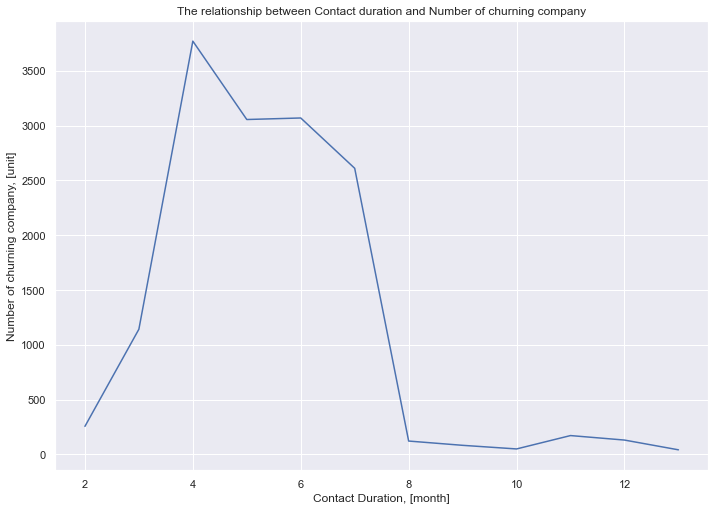

In [24]:
sns.lineplot(data=percent_churn_year_stay, x='year_stay', y='churn')
plt.title('The relationship between Contact duration and Number of churning company')
plt.xlabel('Contact Duration, [month]')
plt.ylabel('Number of churning company, [unit]')

Highly churning values came from the first period of contact duration. The graph aims to the companies who has low contact duration high have opportunity to churn, compare with the rest period. However, we found companies that have 10 years of contact will dramatically increase. This is very exciting data that need to include in model.

### Skewness

From previous task, we found this data has high number of skewness. we must handle this abnormal scenario before constructing the model.

/Users/moomacprom1/miniforge3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/moomacprom1/miniforge3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/moomacprom1/miniforge3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

<AxesSubplot:xlabel='margin_net_pow_ele', ylabel='Density'>

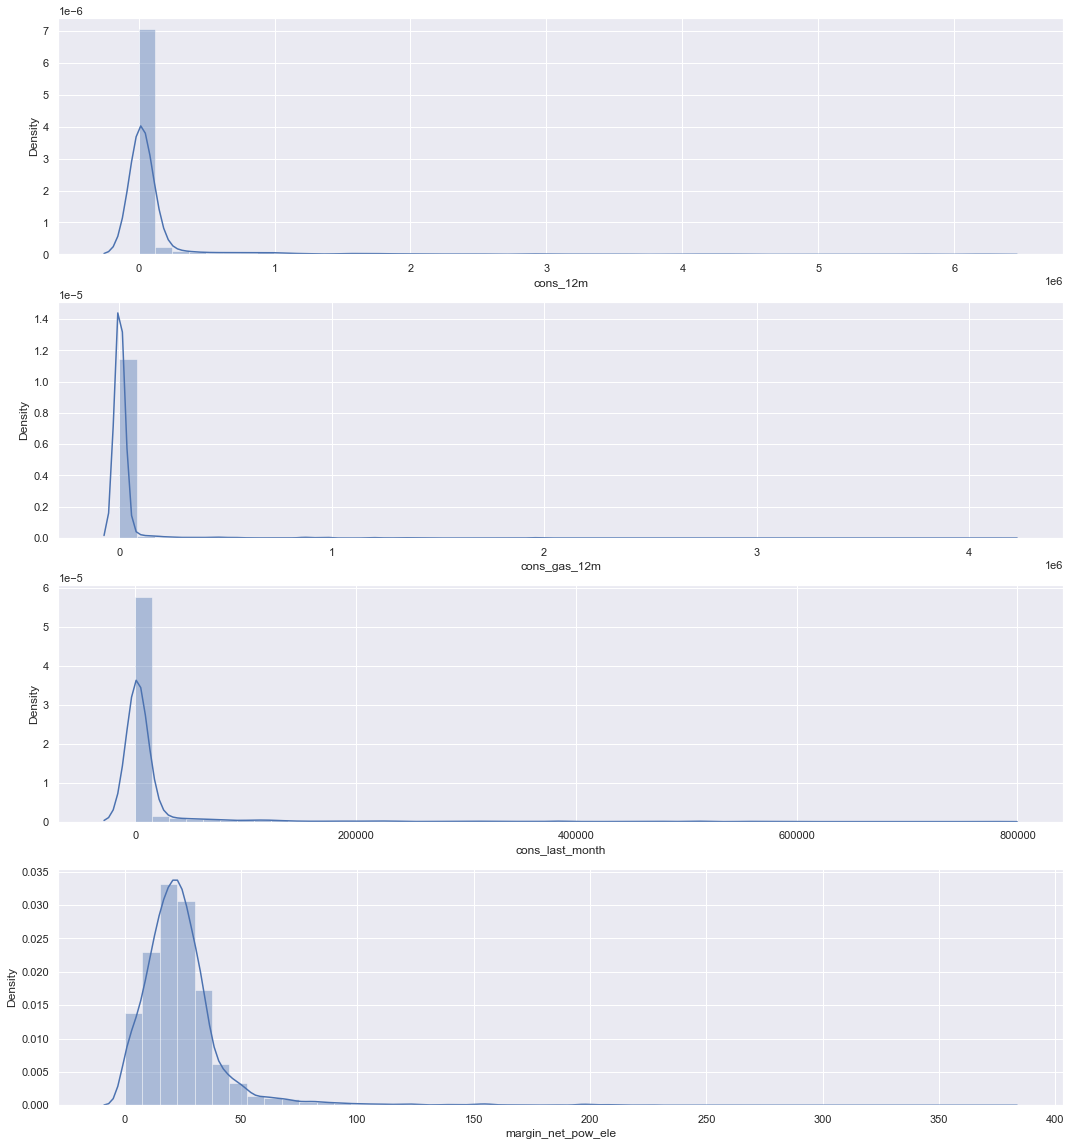

In [25]:
def multiple_box_plot(df, features):
    # Create plot frame
    fig, axs = plt.subplots(nrows=len(features), figsize=(18,20))
    x=0 # time reference
    for i in features:
        # Plot data
        sns.boxplot(data=df, x=i, hue='churn', ax=axs[x])
        x+=1
    plt.show()

def distribution_plot(df, feature, size=(16,6), bins=50):
   # Create dataframe that will be used for plotting
   df = pd.DataFrame({"Stay":client_data[client_data['churn'] == 0][feature],
                     "Churn": client_data[client_data['churn'] == 1][feature]})
   # Plot data
   df[['Stay', 'Churn']].plot(kind='hist',stacked=True, figsize=size, bins=bins)
   plt.xlabel(feature)
   plt.show()

# Plot distribution
fig, axs = plt.subplots(nrows=4, figsize=(18, 20))
sns.set(rc = {'figure.figsize':(15,5)})
sns.distplot(data['cons_12m'], ax=axs[0])
sns.distplot(data['cons_gas_12m'], ax=axs[1])
sns.distplot(data['cons_last_month'], ax=axs[2])
sns.distplot(data['margin_net_pow_ele'], ax=axs[3])

<AxesSubplot:ylabel='Frequency'>

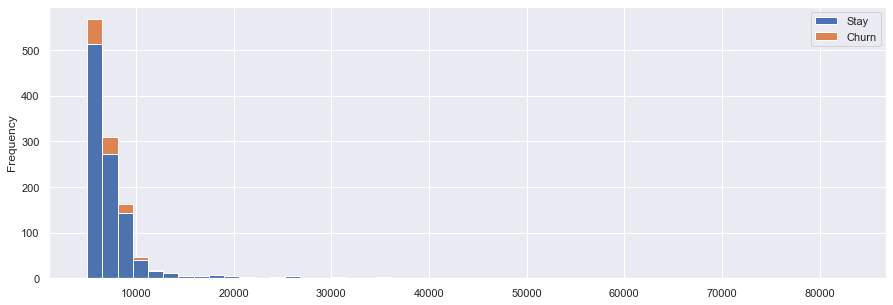

In [26]:
df_ = data[data['forecast_cons_12m'] > 5000]
df = pd.DataFrame({"Stay":df_[df_['churn'] == 0]['forecast_cons_12m'],
                    "Churn": df_[df_['churn'] == 1]['forecast_cons_12m']})
# Plot data
df[['Stay', 'Churn']].plot(kind='hist',stacked=True, bins=50)

There are many way to deal with skewness. Cutting the outliers, in this work, is not one of them. Because, churning company also in the outliers. If we cut outliers, the prediction of high value consumption company will not accurate. 
Logarithm transformation is appropriated for this work. Outliers did not gone and high value company can be predicted.

In [27]:
skewned = ['cons_12m','cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 
            'forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
            'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 
            'margin_net_pow_ele']
for i in skewned:
    data[i] = np.log10(data[i] + 1)

/Users/moomacprom1/miniforge3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/moomacprom1/miniforge3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/moomacprom1/miniforge3/envs/DS/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

<AxesSubplot:xlabel='margin_net_pow_ele', ylabel='Density'>

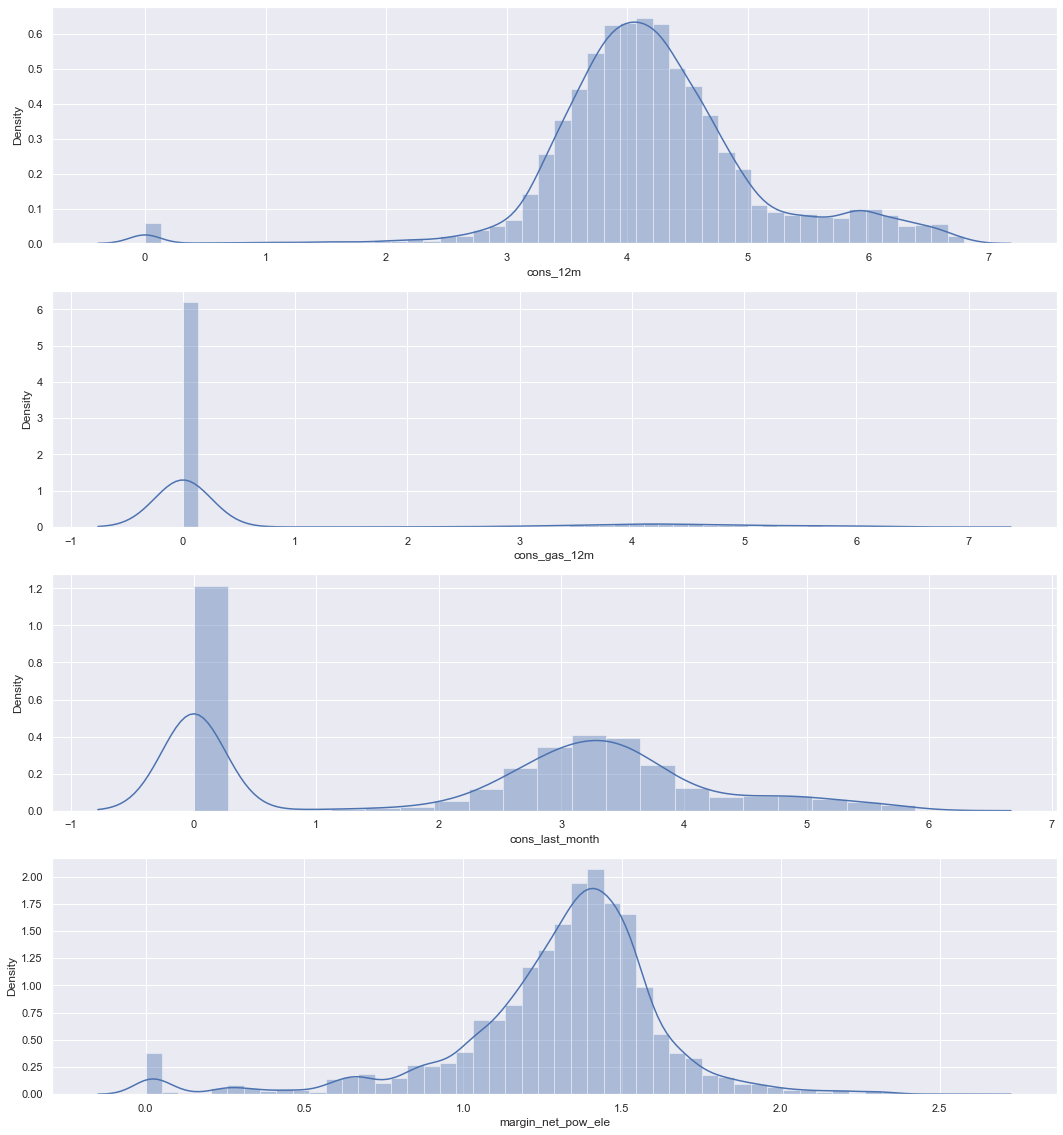

In [28]:
# Plot distribution
fig, axs = plt.subplots(nrows=4, figsize=(18, 20))
sns.set(rc = {'figure.figsize':(15,5)})
sns.distplot(data['cons_12m'], ax=axs[0])
sns.distplot(data['cons_gas_12m'], ax=axs[1])
sns.distplot(data['cons_last_month'], ax=axs[2])
sns.distplot(data['margin_net_pow_ele'], ax=axs[3])

### Finding Significant Features

Using heat map to see the correlation of data

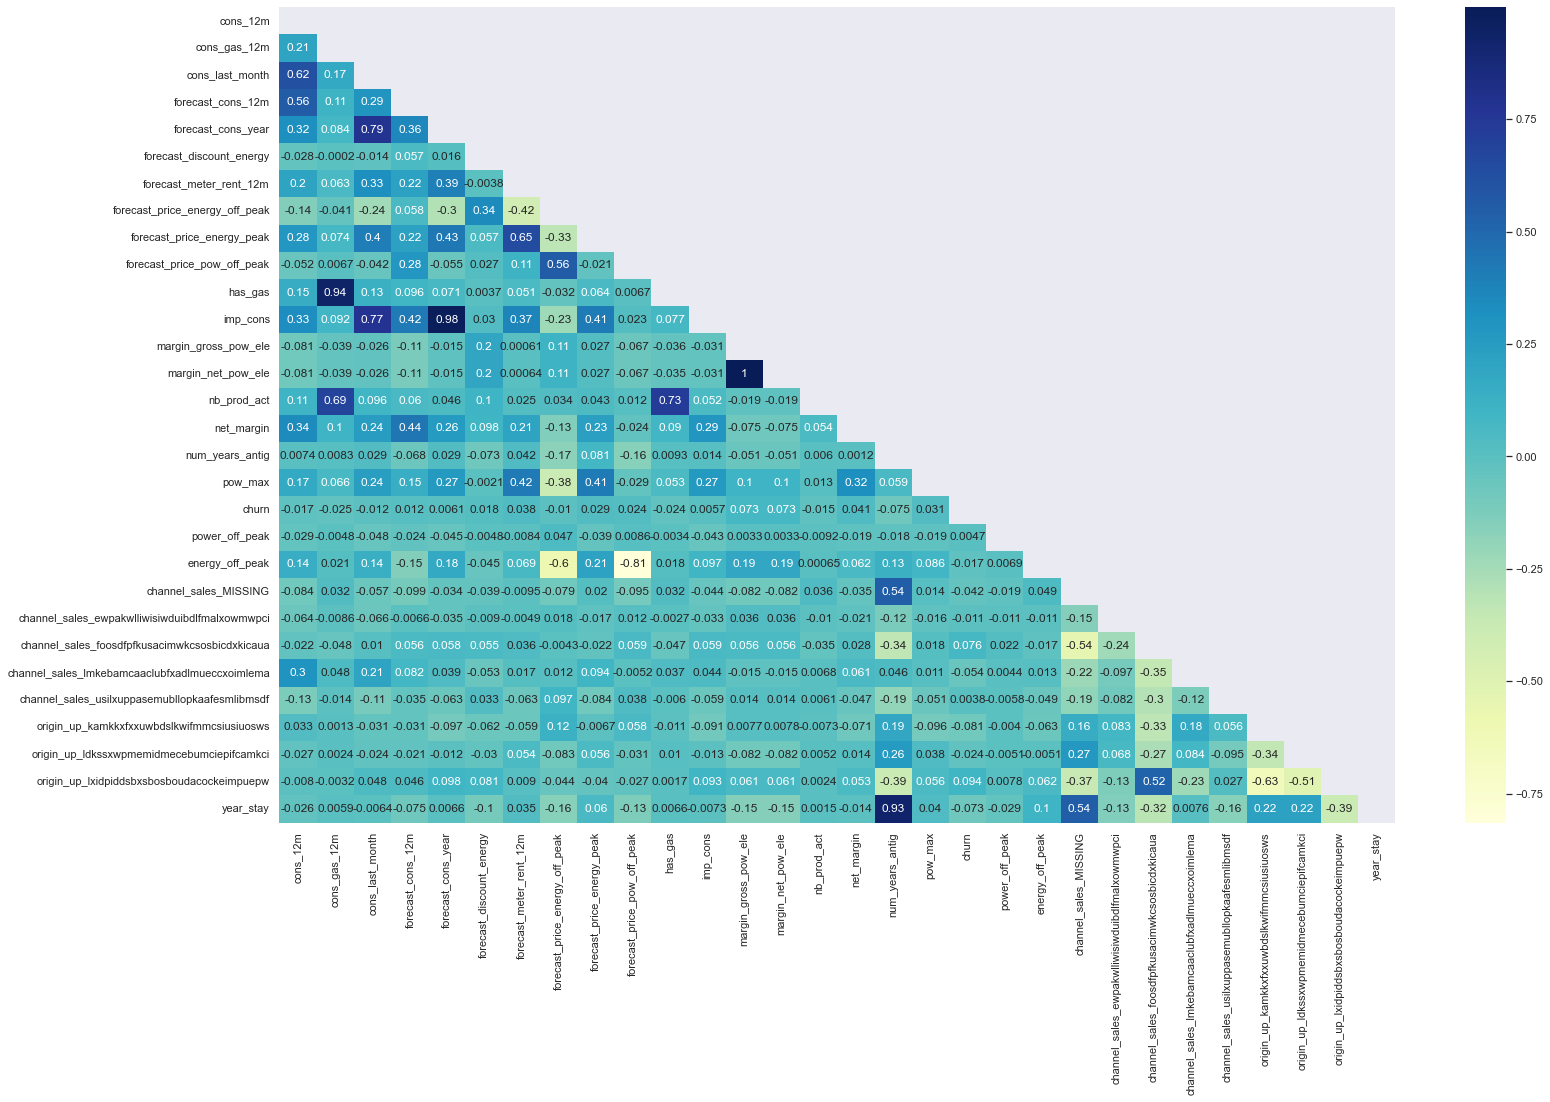

In [29]:
# Heatmap
data_cor = data.corr()
mask = np.triu(np.ones_like(data_cor, dtype=bool))
plt.subplots(figsize=(25,15))
sns.heatmap(data_cor, mask=mask ,cmap = 'YlGnBu', annot=True)
plt.xticks(rotation=90)
plt.show()

In [30]:
abs(data_cor['churn']).sort_values(ascending=False)

churn                                             1.000000
origin_up_lxidpiddsbxsbosboudacockeimpuepw        0.093951
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws        0.081337
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0.075695
num_years_antig                                   0.074520
year_stay                                         0.073029
margin_net_pow_ele                                0.072596
margin_gross_pow_ele                              0.072551
channel_sales_lmkebamcaaclubfxadlmueccxoimlema    0.054300
channel_sales_MISSING                             0.041681
net_margin                                        0.041359
forecast_meter_rent_12m                           0.038497
pow_max                                           0.031031
forecast_price_energy_peak                        0.028985
cons_gas_12m                                      0.025000
has_gas                                           0.024182
origin_up_ldkssxwpmemidmecebumciepifcamkci        0.0239

In [31]:
features = ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m',
            'forecast_cons_year', 'forecast_discount_energy',
            'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
            'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
            'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
            'net_margin', 'num_years_antig', 'pow_max', 'churn', 'power_off_peak',
            'energy_off_peak', 'channel_sales_MISSING',
            'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
            'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
            'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
            'channel_sales_usilxuppasemubllopkaafesmlibmsdf',
            'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
            'origin_up_ldkssxwpmemidmecebumciepifcamkci',
            'origin_up_lxidpiddsbxsbosboudacockeimpuepw', 'year_stay']
           
data_feature = data[features]
data_feature.info()
print(data_feature.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14502 entries, 0 to 14501
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_12m                                        14502 non-null  float64
 1   cons_gas_12m                                    14502 non-null  float64
 2   cons_last_month                                 14502 non-null  float64
 3   forecast_cons_12m                               14502 non-null  float64
 4   forecast_cons_year                              14502 non-null  float64
 5   forecast_discount_energy                        14502 non-null  float64
 6   forecast_meter_rent_12m                         14502 non-null  float64
 7   forecast_price_energy_off_peak                  14502 non-null  float64
 8   forecast_price_energy_peak                      14502 non-null  float64
 9   forecast_price_pow_off_peak            

## Modeling

Based on `decision tree`, the random forest is one of high efficient supervise machine leaning algorithm. For classification model, this is the best choice. Because collecting various decision trees, this method provide vast data set learning, which is appropriate for high features number dataset. By gathering various result from various decision trees, this algorithm is strong for outliers. By using `decision trees`, this model can work well with `non-linear` relationship of features. <br>

Look at data set, the model need to classify churning condition from 29 features, including dummy features, from 14502 row of data. Random forest is appropriate for modeling this work. Decision tree can deal with complex features, combine and average result by bootstrap aggregating.

In [32]:
# Import essential package
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Features Preprocess

In [33]:
# feature
label_train = data_feature['churn']
feature_train_remove_out = data_feature.drop(columns=['churn'])
# Split data to test and train set
x_train, x_test, y_train, y_test = train_test_split(feature_train_remove_out, label_train, test_size=0.2, random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11601, 29)
(11601,)
(2901, 29)
(2901,)


In [34]:
# Model building
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

### Model Evaluate

In [35]:
# Evaluation
y_prediction = rf.predict(x_test)
y_true = y_test.values
print('Accuracy: ',  metrics.accuracy_score(y_true, y_prediction))
print('Precision: ', metrics.precision_score(y_true, y_prediction))

Accuracy:  0.910720441227163
Precision:  0.85


## Summary

From the previous task, data exploratory, we can find lots of outliers occur in interested features. By using logarithm filtering, outliers can be normalized. After training model by using Random Forest Classification, the accuracy of from features given by 91.11%. This score is satisfy for the model.<br>


The efficiency of model was define by splitting data into 2 set, test and train. The trained data was used to train in random forest model. Test set will be used when the training process was ended. Labels were predicted and compare with True value to evaluate score. Which got 91.11% of accuracy and 85.71% of precision is quite good.<br>

For further development, precision of model is only 85%, which is quite high but need to be increased. Gather more data and train again can increase this value.
